In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import seaborn as sns
sns.set_style('white')
import matplotlib.pyplot as plt
import scipy
from mpl_toolkits.mplot3d import Axes3D
from time import sleep
%matplotlib inline

In [2]:
def minimize_and_plot(func, x, func_kwargs=None, method='BFGS'):
    func_kwargs = {} if func_kwargs is None else func_kwargs
    xrange = (-10, 10, 100)
    
    line_data = pd.DataFrame(data=np.linspace(*xrange), columns=['x'])
    line_data['f of x'] = func(line_data['x'].to_numpy().flatten(), **func_kwargs)
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.lineplot(x='x', y='f of x', data=line_data, ax=ax)
    scatter = ax.scatter(x, func(x, **func_kwargs))
    plt.show()

    def internal_func(x, scatter, fig):
        f = func(x, **func_kwargs)
        scatter.set_offsets(np.row_stack([scatter.get_offsets(), [x[0], f]]))
        fig.canvas.draw()
        sleep(0.2)
        return f
    
    
    res = minimize(internal_func, x, args=(scatter, fig), method=method)
    return res

In [3]:
def normal_mean_msm(mu, sample):
    n_simulations =  100
    sigma = np.ones(len(mu))
    sim_samples = np.random.normal(loc=mu, scale=sigma, size=(n_simulations, len(mu)))
    diff_mu = sim_samples.mean(axis=0) - sample.mean()
    diff_sigma = sim_samples.std(axis=0) - sample.std()
    diff = np.row_stack([diff_mu, diff_sigma])
    criterion = (diff ** 2).sum(axis=0)
    if len(criterion) == 1:
        return criterion[0]
    else:
        return criterion
    

def smooth_normal_mean_msm(mu, sample):
    np.random.seed(5471)
    n_simulations = 10000
    sigma = np.ones(len(mu))
    
    sim_samples = np.zeros((n_simulations, len(mu)))
    sim_samples[:] = np.random.normal(size=(n_simulations, 1))
    sim_samples *= sigma.reshape(1, -1)
    sim_samples += mu.reshape(1, -1)
    diff_mu = sim_samples.mean(axis=0) - sample.mean()
    diff_sigma = sim_samples.std(axis=0) - sample.std()
    diff = np.row_stack([diff_mu, diff_sigma])
    criterion = (diff ** 2).sum(axis=0)
    if len(criterion) == 1:
        return criterion[0]
    else:
        return criterion
    
    
def normal_mean_likelihood(mu, sample):
    sample = sample.reshape(-1, 1)
    mu = mu.reshape(1, -1)
    sigma = 1
    stand_diffs = (sample - mu) / sigma
    likelihoods = scipy.stats.norm.pdf(stand_diffs)
    return - np.log(likelihoods).sum(axis=0)


def square(x):
    return x ** 2

In [4]:
# Methods

# Nelder-Mead
# BFGS
# Powell
# SLSQP
# TNC
# COBYLA

<IPython.core.display.Javascript object>


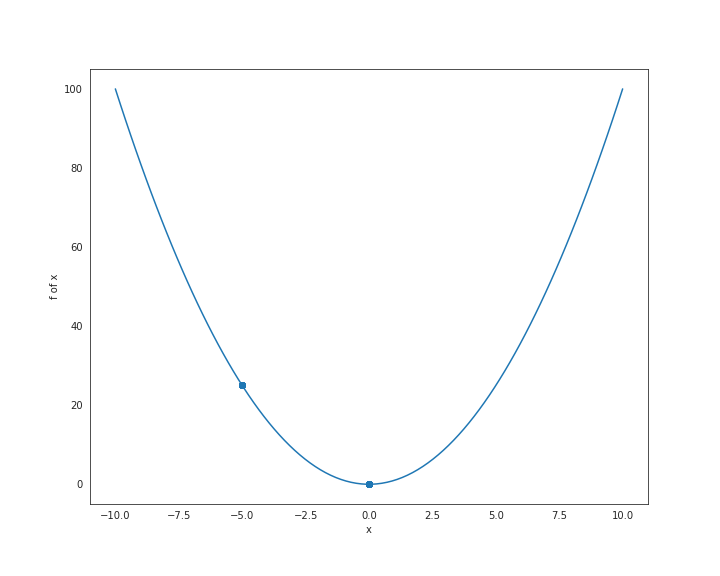

In [6]:
%matplotlib notebook
np.random.seed(5471)
sample = np.random.normal(size=100)

res = minimize_and_plot(
    square, 
    x=np.array([-5.0]), 
    method='TNC',
)

<IPython.core.display.Javascript object>


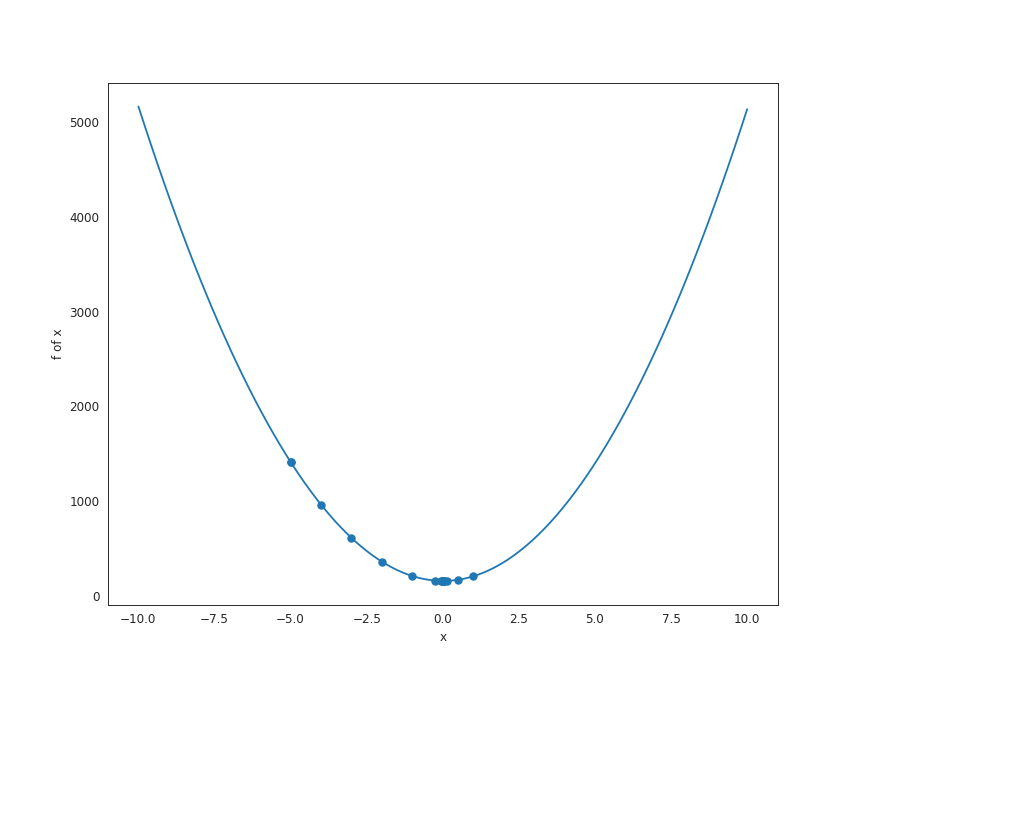

In [20]:
%matplotlib notebook
np.random.seed(5471)
sample = np.random.normal(size=100)

res = minimize_and_plot(
    normal_mean_likelihood, 
    x=np.array([-5.0]), 
    method='Cobyla',
    func_kwargs={'sample': sample})

<IPython.core.display.Javascript object>


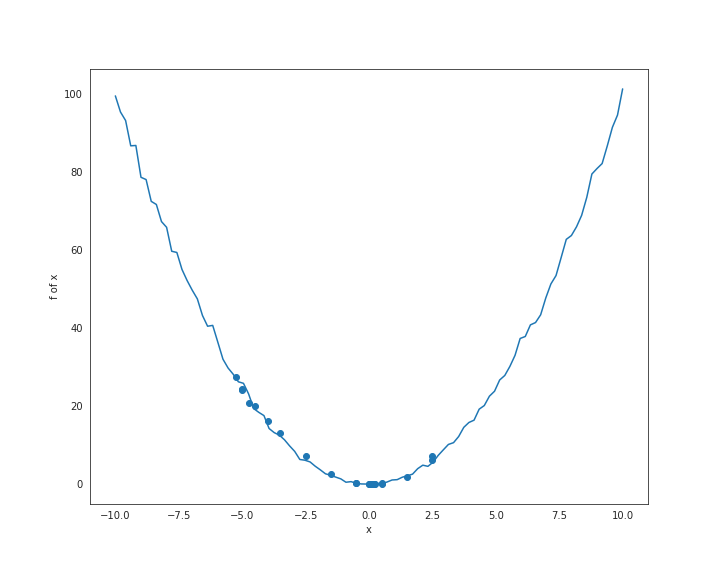

In [8]:
%matplotlib notebook
np.random.seed(5471)
sample = np.random.normal(size=100)

res = minimize_and_plot(
    normal_mean_msm, 
    x=np.array([-5.0]), 
    method='Nelder-Mead',
    func_kwargs={'sample': sample})

<IPython.core.display.Javascript object>


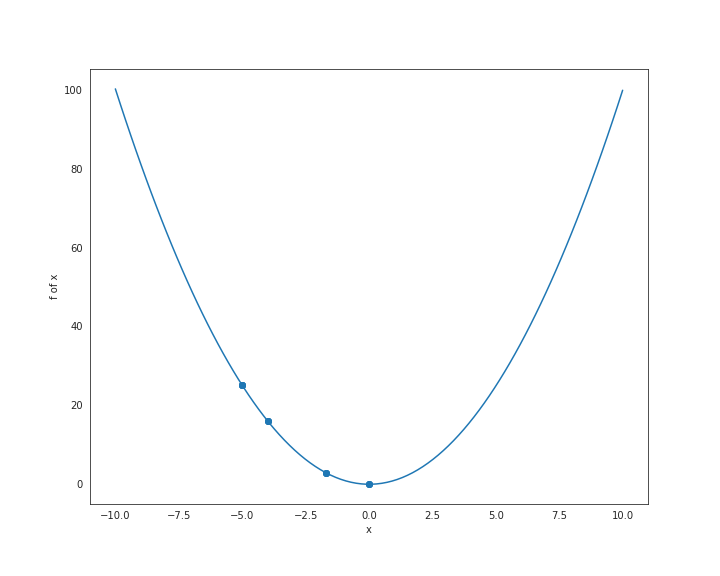

In [9]:
%matplotlib notebook
np.random.seed(5471)
sample = np.random.normal(size=100)

res = minimize_and_plot(
    smooth_normal_mean_msm, 
    x=np.array([-5.0]), 
    method='BFGS',
    func_kwargs={'sample': sample})

In [ ]:
choice_prob_obs[choice_prob_obs <= 1e-250] = 1e-250

In [10]:
a = np.ones((2, 2))
b = np.zeros(2)
a

array([[1., 1.],
       [1., 1.]])

In [11]:
b

array([0., 0.])

In [12]:
np.column_stack([a, b])

array([[1., 1., 0.],
       [1., 1., 0.]])